<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-평균
> k-평균 알고리즘의 작동 방식을 이해하고 과일 사진을 자동으로 모으는 비지도 학습 모델을 만들어 보기

#### k-평균 알고리즘
> 처음에는 랜덤하게 클러스터 중심을 선택하고 점차 가장 가까운 샘플의 중심으로 이동하는 비교적 간단한 알고리즘
> 작동 방식
1. 무작위로 k개의 클러스터 중심을 정합니다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경합니다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가며 반복합니다.


KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2022-05-11 06:35:29--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-05-11 06:35:29--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-05-11 06:35:30--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443..

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# 군집된 결과는KMeans 클래스 객체의 labels_속성에 저장됨(n_clusters=3 이기 때문에 labels_ 배열의 값은 0,1,2 중 하나이다.)
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
# 각클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하는 함수
import matplotlib.pyplot as plt
def draw_fruit(arr, ratio=1):
  n = len(arr) # 샘플 개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개의 이미지를 그림
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (rows * ratio, cols * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis("off")
  plt.show()

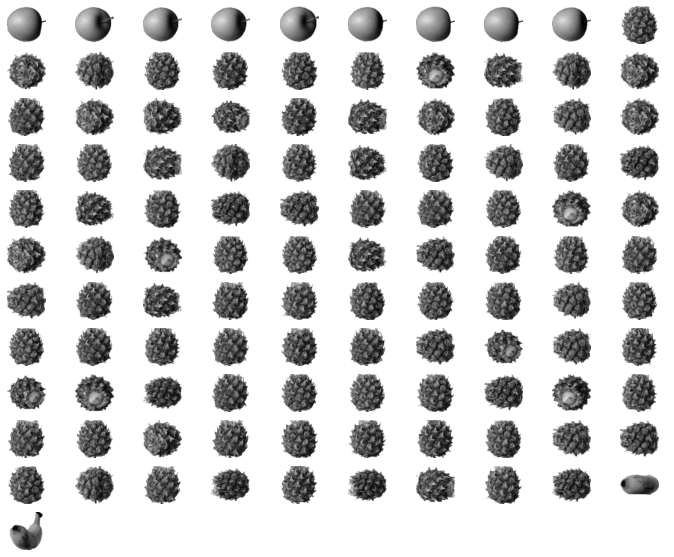

In [ ]:
# 레이블이 0인 과일 사진만 그리기
draw_fruit(fruits[km.labels_ == 0])

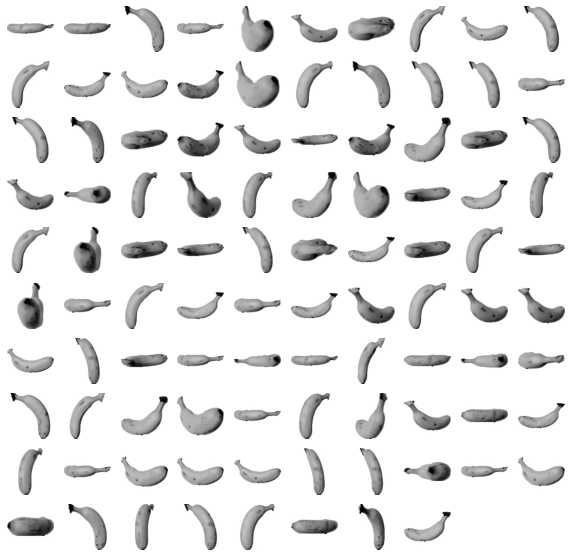

In [ ]:
# 레이블이 1인 과일 사진만 그리기
draw_fruit(fruits[km.labels_ == 1])

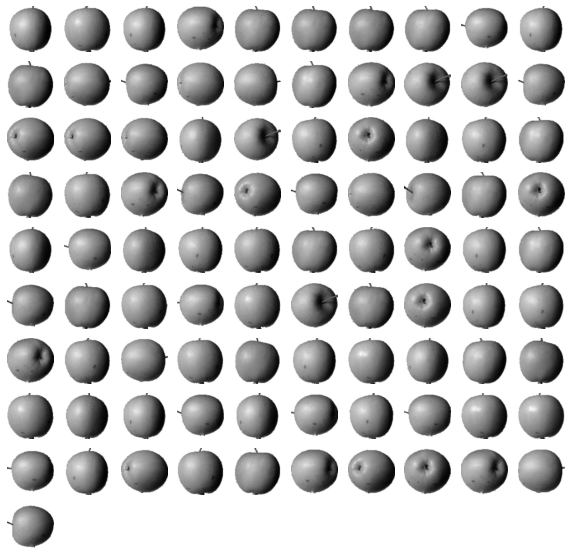

In [ ]:
# 레이블이 2인 과일 사진만 그리기
draw_fruit(fruits[km.labels_ == 2])

#### 클러스터 중심
- KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있다.

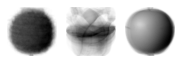

In [ ]:
draw_fruit(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

In [ ]:
# transform(이차원 배열) : 훈련 데이터 샘플을 데이터 샘플에서 클러스터 중심까지의 거리로 변환
# 0인덱스 거리가 가장 짧은거로 봐서는 레이블 0 에 속함
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [ ]:
# predict(이차원 배열) : 가장 가까운 클러스터 중심을 예측 클래스로 출력
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

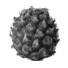

In [ ]:
draw_fruit(fruits[100:101])

In [ ]:
# k-평균 알고리즘은 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다. 반복한 횟수는 n_iter_ 속성에 저장
km.n_iter_

4

#### 최적의 k 찾기
- k-평균 알고리즘의 단점 : 클러스터 개수를 사전에 지정해야 한다.
- 방법
> 엘보우 
  - 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법
  - 이너셔 : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합
  - 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어든다 -> 이너셔도 줄어듬

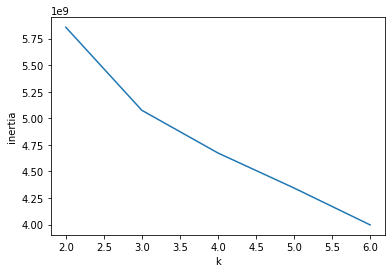

In [ ]:
# inertia_ 자동으로 이너셔를 계산해줌
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()